<a href="https://colab.research.google.com/github/dntwaritag/Air-Quality-Forecasting/blob/main/Denys_Ntwaritaganzwa_%5Bair_quality_forecasting_starter_code%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [3]:
# Import necessary libraries
import pandas as pd  # for handling data
import numpy as np  # for numerical operations
import seaborn as sns  # for better visualizations
import matplotlib.pyplot as plt  # for plotting graphs
from tensorflow.keras.models import Sequential  # for building models
from tensorflow.keras.layers import LSTM, Dense  # main model layers
import tensorflow as tf

from tensorflow.keras import Input  # for input layer
from tensorflow.keras.layers import Dropout  # to prevent overfitting
from tensorflow.keras.optimizers import Adam  # to optimize learning
from tensorflow.keras.callbacks import EarlyStopping  # stop training early if needed
from tensorflow.keras.regularizers import l2  # for regularization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [1]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/Mathematics for Machine Learning/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Mathematics for Machine Learning/test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [5]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [6]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [7]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


In [8]:
# Explore the training data
print("Training Data Overview:")
print(train.head())

Training Data Overview:
                     No      DEWP      TEMP      PRES       Iws        Is  \
datetime                                                                    
2010-01-01 00:00:00   1 -1.580878 -1.922250  0.443328 -0.441894 -0.069353   
2010-01-01 01:00:00   2 -1.580878 -2.004228  0.345943 -0.379306 -0.069353   
2010-01-01 02:00:00   3 -1.580878 -1.922250  0.248559 -0.343514 -0.069353   
2010-01-01 03:00:00   4 -1.580878 -2.168183  0.248559 -0.280926 -0.069353   
2010-01-01 04:00:00   5 -1.511594 -2.004228  0.151174 -0.218339 -0.069353   

                           Ir   cbwd_NW   cbwd_SE   cbwd_cv  pm2.5  
datetime                                                            
2010-01-01 00:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 01:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 02:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 03:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 04:00:00 -0

In [9]:
print("\nTraining Data Info:")
train.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30676 entries, 2010-01-01 00:00:00 to 2013-07-02 03:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       30676 non-null  int64  
 1   DEWP     30676 non-null  float64
 2   TEMP     30676 non-null  float64
 3   PRES     30676 non-null  float64
 4   Iws      30676 non-null  float64
 5   Is       30676 non-null  float64
 6   Ir       30676 non-null  float64
 7   cbwd_NW  30676 non-null  float64
 8   cbwd_SE  30676 non-null  float64
 9   cbwd_cv  30676 non-null  float64
 10  pm2.5    28755 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB


In [10]:
print("\nTraining Data Descriptive Statistics:")
print(train.describe())


Training Data Descriptive Statistics:
                 No          DEWP          TEMP          PRES           Iws  \
count  30676.000000  30676.000000  30676.000000  30676.000000  30676.000000   
mean   15338.500000     -0.029431     -0.062712      0.013612      0.030542   
std     8855.542765      0.994087      1.015193      1.008991      1.018337   
min        1.000000     -2.135153     -2.578070     -2.380821     -0.468688   
25%     7669.750000     -0.888034     -0.938521     -0.822670     -0.441894   
50%    15338.500000     -0.056622      0.045209     -0.043595     -0.352512   
75%    23007.250000      0.913358      0.864984      0.832865      0.005216   
max    30676.000000      1.814055      2.340578      2.877939     11.231956   

                 Is            Ir       cbwd_NW       cbwd_SE       cbwd_cv  \
count  30676.000000  30676.000000  30676.000000  30676.000000  30676.000000   
mean       0.016992      0.011253      0.016193      0.005833     -0.025008   
std        1

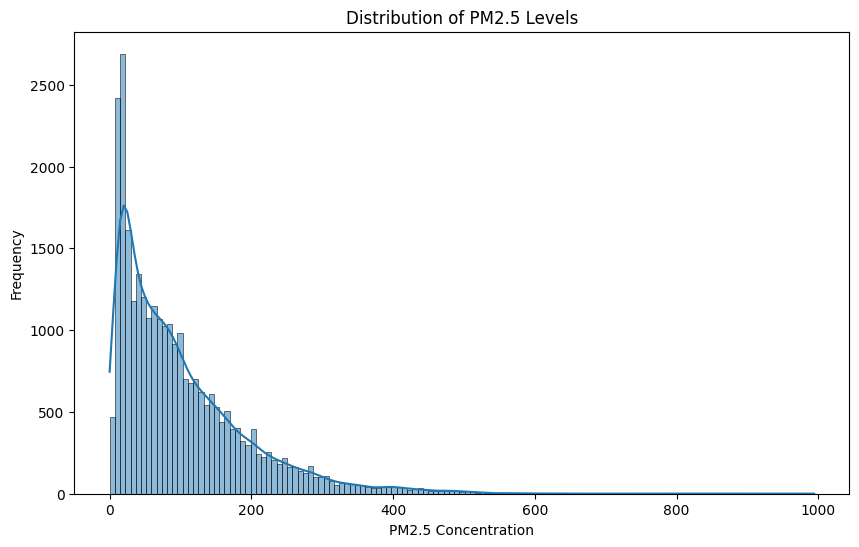

The distribution of PM2.5 shows a right skew, indicating that lower concentrations are more frequent. The KDE plot provides a smoothed estimate of the distribution.


In [11]:
# Visualize PM2.5 distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['pm2.5'].dropna(), kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()
print("The distribution of PM2.5 shows a right skew, indicating that lower concentrations are more frequent. The KDE plot provides a smoothed estimate of the distribution.")

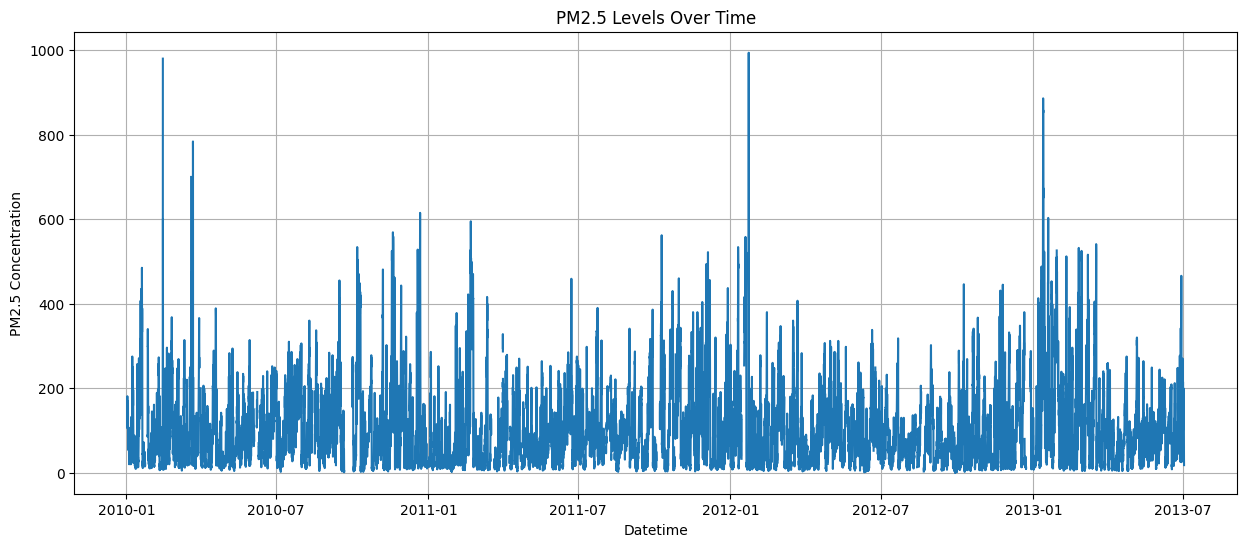

This time series plot shows the fluctuations in PM2.5 levels over the duration of the dataset. We can observe potential seasonal patterns and periods of high pollution.


In [15]:
# Visualize trends of PM2.5 over time
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['pm2.5']) # Changed train['datetime'] to train.index
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)
plt.show()
print("This time series plot shows the fluctuations in PM2.5 levels over the duration of the dataset. We can observe potential seasonal patterns and periods of high pollution.")

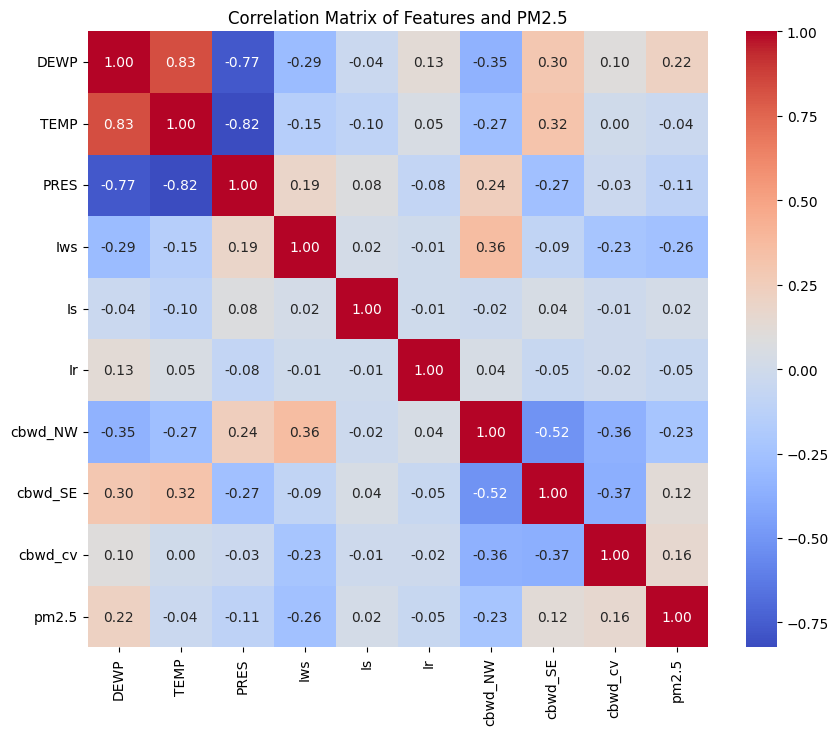

The correlation matrix shows the linear relationships between the features and PM2.5. We can see which meteorological variables have the strongest positive or negative correlations with the target variable.


In [14]:
# Correlation analysis
correlation_matrix = train[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'pm2.5']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and PM2.5')
plt.show()
print("The correlation matrix shows the linear relationships between the features and PM2.5. We can see which meteorological variables have the strongest positive or negative correlations with the target variable.")

# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [16]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)



Missing Values:
No         0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
pm2.5      0
dtype: int64


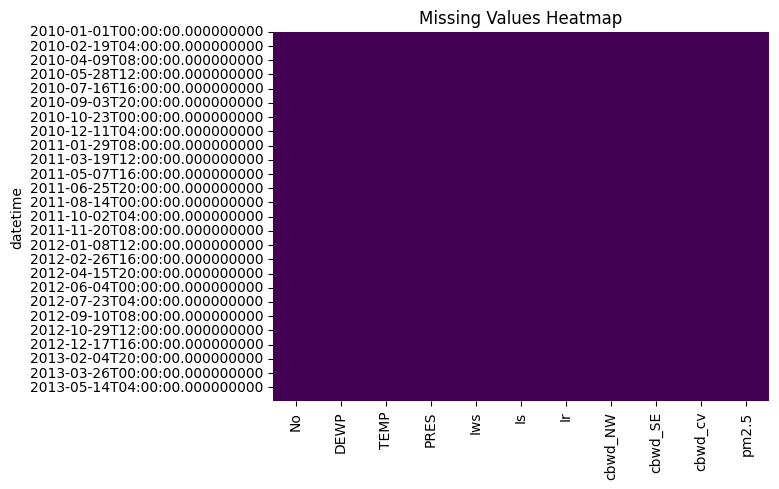

The heatmap visually represents the missing values in the dataset. We can observe which columns have missing data and the patterns of these missing values.


In [17]:
# Missing value analysis
print("\nMissing Values:")
print(train.isnull().sum())
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("The heatmap visually represents the missing values in the dataset. We can observe which columns have missing data and the patterns of these missing values.")

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [18]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [19]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

# Model Design & Architecture


# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [20]:
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.001))) # L2 regularization added
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu', return_sequences=False, kernel_regularizer=l2(0.001))) # L2 regularization added
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001))) # L2 regularization added
model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,177 (477.25 KB)

 Trainable params: 122,177 (477.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
def create_lstm_model(units=64, layers=1, dropout=0.2, learning_rate=0.001):
    model = Sequential()
    for i in range(layers):
        if i == 0:
            model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        elif i < layers - 1:
            model.add(LSTM(units, activation='relu', return_sequences=True))
        else:
            model.add(LSTM(units, activation='relu', return_sequences=False))
        model.add(Dropout(dropout))
        units = units // 2
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Experiment settings
experiments = []
units_options = [64, 128]
layers_options = [1, 2]
dropout_options = [0.2, 0.3]
learning_rate_options = [0.001, 0.0005]
batch_size_options = [32, 64]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

experiment_count = 0  # Initialize the counter

for units in units_options:
    for layers in layers_options:
        for dropout in dropout_options:
            for learning_rate in learning_rate_options:
                for batch_size in batch_size_options:
                    experiment_count += 1  # Increment the counter
                    print(f"\n--- Experiment {experiment_count} ---")
                    model = create_lstm_model(units=units, layers=layers, dropout=dropout, learning_rate=learning_rate)
                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
                    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
                    rmse = np.sqrt(model.evaluate(X_val, y_val, verbose=0))
                    experiments.append({
                        'Experiment': f'Exp{experiment_count:03}',  # Format experiment number
                        'Units': units,
                        'Layers': layers,
                        'Dropout': dropout,
                        'Learning Rate': learning_rate,
                        'Batch Size': batch_size,
                        'RMSE': rmse
                    })


--- Experiment 1 ---

--- Experiment 2 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 3 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 4 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 6 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 7 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 8 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 9 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Experiment 11 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [24]:
# Create and display the experiment table
experiment_table = pd.DataFrame(experiments)
print("\nExperiment Table:")
print(experiment_table)




Experiment Table:
  Experiment  Units  Layers  Dropout  Learning Rate  Batch Size       RMSE
0     Exp001     64       1      0.2         0.0010          32  71.127729
1     Exp002     64       1      0.2         0.0010          64  71.682051
2     Exp003     64       1      0.2         0.0005          32  72.217486
3     Exp004     64       1      0.2         0.0005          64  72.866705
4     Exp005     64       1      0.3         0.0010          32  71.291541
5     Exp006     64       1      0.3         0.0010          64  71.870768
6     Exp007     64       1      0.3         0.0005          32  72.420012
7     Exp008     64       1      0.3         0.0005          64  72.993806
8     Exp009     64       2      0.2         0.0010          32  70.331987
9     Exp010     64       2      0.2         0.0010          64  70.636071


In [25]:
# Find and print the best experiment
best_experiment = experiment_table.loc[experiment_table['RMSE'].idxmin()]
print("\nBest Experiment Details:")
print(best_experiment)


Best Experiment Details:
Experiment          Exp009
Units                   64
Layers                   2
Dropout                0.2
Learning Rate        0.001
Batch Size              32
RMSE             70.331987
Name: 8, dtype: object


In [26]:
# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32
)

Epoch 1/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5465.1299
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 5491.0317
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5400.9634
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5386.7129
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5545.4927
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5341.5195
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5386.2339
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5384.5239
Epoch 9/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5502.2998
Epoch 10/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5419.8232


767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


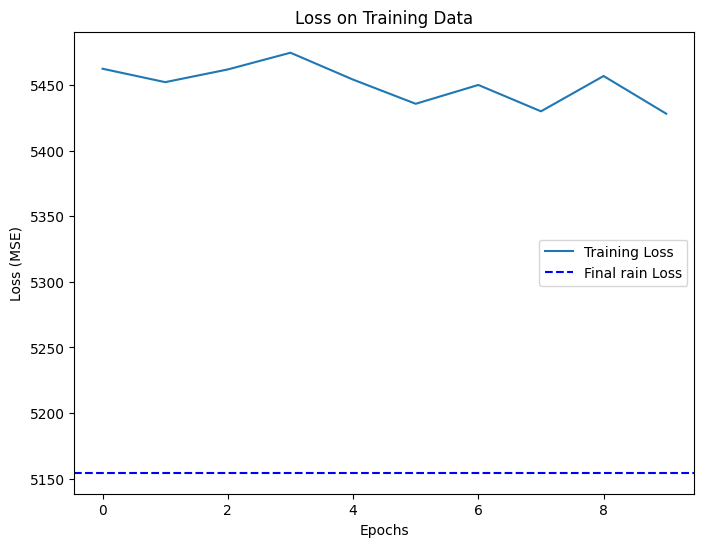

Final Training Loss (MSE): 5154.496201673943


In [27]:
# Calculate training loss
train_predictions = model.predict(X_train)
train_loss = np.mean((y_train - train_predictions.flatten())**2)

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")

In [28]:
# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('/content/drive/MyDrive/Mathematics for Machine Learning/subm_fixed.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
